In [2]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [2]:
df = pd.read_csv('dataset/train.csv', header=0)
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df

,date,wh_id,sales
0,2019-01-02,1.0,44
1,2019-01-03,1.0,48
2,2019-01-04,1.0,36
3,2019-01-05,1.0,40
4,2019-01-06,1.0,80
...,...,...,...
453210,2021-03-12,97.0,84
453211,2021-03-13,97.0,60
453212,2021-03-14,97.0,81
453213,2021-03-15,97.0,90


In [3]:
df_wh=df[df['wh_id'] == 1]
df_wh

,date,wh_id,sales
0,2019-01-02,1.0,44
1,2019-01-03,1.0,48
2,2019-01-04,1.0,36
3,2019-01-05,1.0,40
4,2019-01-06,1.0,80
...,...,...,...
800,2021-03-12,1.0,57
801,2021-03-13,1.0,60
802,2021-03-14,1.0,66
803,2021-03-15,1.0,63


In [4]:
df2 = TimeSeries.from_dataframe(df_wh,'date','sales')
df2

<TimeSeries (DataArray) (date: 805, component: 1, sample: 1)>
array([[[4.400e+01]],

       [[4.800e+01]],

       [[3.600e+01]],

       [[4.000e+01]],

       [[8.000e+01]],

       [[3.600e+01]],

       [[2.000e+01]],

       [[2.400e+01]],

       [[2.400e+01]],

       [[2.400e+01]],

...

       [[1.680e+02]],

       [[5.100e+01]],

       [[4.800e+01]],

       [[7.500e+01]],

       [[6.900e+01]],

       [[5.700e+01]],

       [[6.000e+01]],

       [[6.600e+01]],

       [[6.300e+01]],

       [[4.800e+01]]])
Coordinates:
  * date       (date) datetime64[ns] 2019-01-02 2019-01-03 ... 2021-03-16
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [2]:
from darts.models import ExponentialSmoothing
train = df2
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(61)

NameError: name 'df2' is not defined

In [58]:
import os

In [15]:
def preprocess1(df):
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.set_index(['date'], inplace=True)
    df.drop(columns=['Unnamed: 0', 'wh_id'], inplace=True)
    return df

In [16]:
def preprocess2(daily_data):
    daily_data['day'] = pd.DatetimeIndex(daily_data.index).day
    daily_data['weekday'] = ((pd.DatetimeIndex(daily_data.index).dayofweek) // 5 == 1).astype(float)
    daily_data['season'] = [month%12 // 3 + 1 for month in pd.DatetimeIndex(daily_data.index).month]
    daily_data.drop(columns='weekday', inplace=True)
    return daily_data

In [68]:
from darts.models import CatBoostModel

In [75]:
model = CatBoostModel(lags=7, add_encoders={'custom':'tot_cases'})

In [76]:
dft = pd.read_csv('dataset/wh_wise_data/train/train_wh_1.csv')

In [79]:
dft['date'] = pd.to_datetime(dft['date'],dayfirst = True)

In [83]:
dft

,Unnamed: 0,date,wh_id,sales,tot_cases
0,0,2019-01-02,1.0,44,0.0
1,1,2019-01-03,1.0,48,0.0
2,2,2019-01-04,1.0,36,0.0
3,3,2019-01-05,1.0,40,0.0
4,4,2019-01-06,1.0,80,0.0
...,...,...,...,...,...
800,800,2021-03-12,1.0,57,348516.0
801,801,2021-03-13,1.0,60,349425.0
802,802,2021-03-14,1.0,66,350061.0
803,803,2021-03-15,1.0,63,350506.0


In [88]:
dft = dft[['date', 'sales', 'tot_cases']]

In [91]:
df2 = TimeSeries.from_dataframe(df_wh,'date','sales')
df2

<TimeSeries (DataArray) (date: 805, component: 1, sample: 1)>
array([[[4.400e+01]],

       [[4.800e+01]],

       [[3.600e+01]],

       [[4.000e+01]],

       [[8.000e+01]],

       [[3.600e+01]],

       [[2.000e+01]],

       [[2.400e+01]],

       [[2.400e+01]],

       [[2.400e+01]],

...

       [[1.680e+02]],

       [[5.100e+01]],

       [[4.800e+01]],

       [[7.500e+01]],

       [[6.900e+01]],

       [[5.700e+01]],

       [[6.000e+01]],

       [[6.600e+01]],

       [[6.300e+01]],

       [[4.800e+01]]])
Coordinates:
  * date       (date) datetime64[ns] 2019-01-02 2019-01-03 ... 2021-03-16
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [72]:
model.fit(df2)

In [73]:
prediction = model.predict(61)
prediction

<TimeSeries (DataArray) (date: 61, component: 1, sample: 1)>
array([[[57.60789358]],

       [[61.72435523]],

       [[59.16580225]],

       [[63.65534505]],

       [[61.26566438]],

       [[55.91523276]],

       [[61.60268475]],

       [[63.57681211]],

       [[63.47548848]],

       [[65.27726686]],

...

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]],

       [[67.26614598]]])
Coordinates:
  * date       (date) datetime64[ns] 2021-03-17 2021-03-18 ... 2021-05-16
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

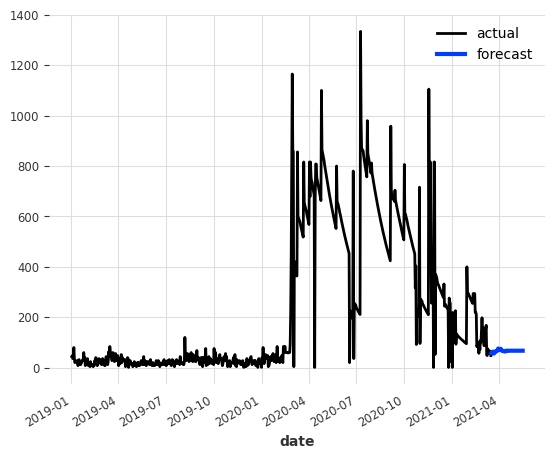

In [74]:
import matplotlib.pyplot as plt

df2.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

## Training And Predicting over 559 warehouses

In [18]:
from darts import TimeSeries

In [5]:
from darts.models import TBATS

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [1]:
TRAIN_PATH = 'dataset/wh_wise_data/train/'
TEST_PATH = 'dataset/wh_wise_data/test/'

In [9]:
SAVE_PATH = 'tbats_model_preds'
wh_tr = sorted(os.listdir(TRAIN_PATH))
wh_tst = sorted(os.listdir(TEST_PATH))

In [3]:
wh_ids = [int(wh.split('_')[-1][:-4]) for wh in wh_tr]

In [4]:
wh_ids[337:427]

[370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 38,
 380,
 382,
 383,
 384,
 386,
 387,
 388,
 390,
 391,
 393,
 394,
 401,
 403,
 407,
 41,
 410,
 411,
 412,
 418,
 420,
 422,
 423,
 424,
 427,
 428,
 429,
 431,
 432,
 436,
 437,
 438,
 439,
 440,
 441,
 443,
 445,
 447,
 452,
 453,
 454,
 455,
 460,
 462,
 464,
 465,
 466,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 478,
 479,
 48,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 563,
 564,
 569,
 578,
 579,
 580,
 6,
 61,
 621,
 622]

In [125]:
whnum=0

In [6]:
os.makedirs('tbatss_model')

In [7]:
wh_tr

['train_wh_1.csv',
 'train_wh_10.csv',
 'train_wh_1000.csv',
 'train_wh_1001.csv',
 'train_wh_1002.csv',
 'train_wh_1003.csv',
 'train_wh_1004.csv',
 'train_wh_1005.csv',
 'train_wh_1006.csv',
 'train_wh_1007.csv',
 'train_wh_1008.csv',
 'train_wh_1009.csv',
 'train_wh_101.csv',
 'train_wh_1010.csv',
 'train_wh_1011.csv',
 'train_wh_1012.csv',
 'train_wh_1013.csv',
 'train_wh_1014.csv',
 'train_wh_1015.csv',
 'train_wh_1016.csv',
 'train_wh_1017.csv',
 'train_wh_1018.csv',
 'train_wh_1019.csv',
 'train_wh_1020.csv',
 'train_wh_1021.csv',
 'train_wh_1022.csv',
 'train_wh_1023.csv',
 'train_wh_1025.csv',
 'train_wh_1026.csv',
 'train_wh_1027.csv',
 'train_wh_1028.csv',
 'train_wh_1029.csv',
 'train_wh_103.csv',
 'train_wh_1030.csv',
 'train_wh_1031.csv',
 'train_wh_1033.csv',
 'train_wh_1037.csv',
 'train_wh_1038.csv',
 'train_wh_1039.csv',
 'train_wh_1040.csv',
 'train_wh_1042.csv',
 'train_wh_1049.csv',
 'train_wh_1050.csv',
 'train_wh_1058.csv',
 'train_wh_1059.csv',
 'train_wh_106.cs

In [8]:
from tqdm.notebook import trange, tqdm

In [13]:
import pandas as pd

In [19]:
for whnum in trange(len(wh_tr)):
    wh_tr_df = pd.read_csv(os.path.join(TRAIN_PATH, wh_tr[whnum]))
    wh_tst_df = pd.read_csv(os.path.join(TEST_PATH, wh_tst[whnum]))
    wh_tr_df = (preprocess1(wh_tr_df))
    id = int(wh_tr[whnum].split('_')[2][:-4])
    wh_tr_df.reset_index(drop=False, inplace=True)
    # print(wh_tr_df)
    wh_tr_df = TimeSeries.from_dataframe(wh_tr_df, 'date', 'sales')
    model = TBATS(use_arma_errors=True)
    model.fit(wh_tr_df)
    model.save(f'tbats_model_preds/wh_{id}.pkl')
    y_preds = model.predict(61)
    y_preds.to_csv(os.path.join(SAVE_PATH, f'wh_{wh_ids[whnum]}.csv'))
    

  0%|          | 0/559 [00:00<?, ?it/s]

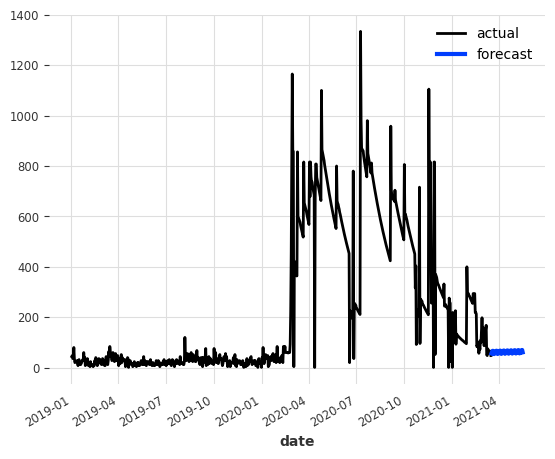

In [44]:
import matplotlib.pyplot as plt

df2.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [12]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

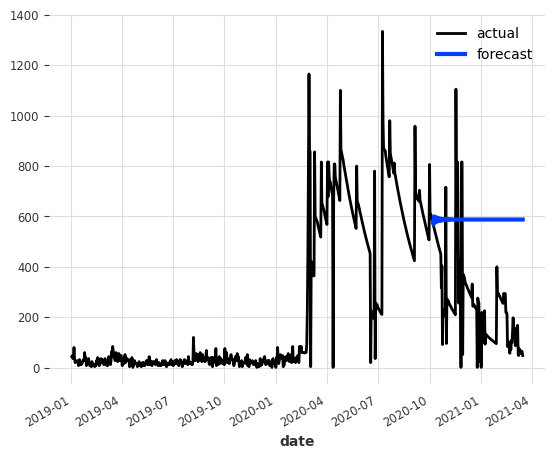

In [13]:
df2.plot(label='actual')
prediction_aarima.plot(label='forecast', lw=3)
plt.legend()

In [35]:
from darts.models import Prophet
models = [ExponentialSmoothing()]

backtests = [model.historical_forecasts(df2,
                            start=.5,
                            forecast_horizon=3)
             for model in models]

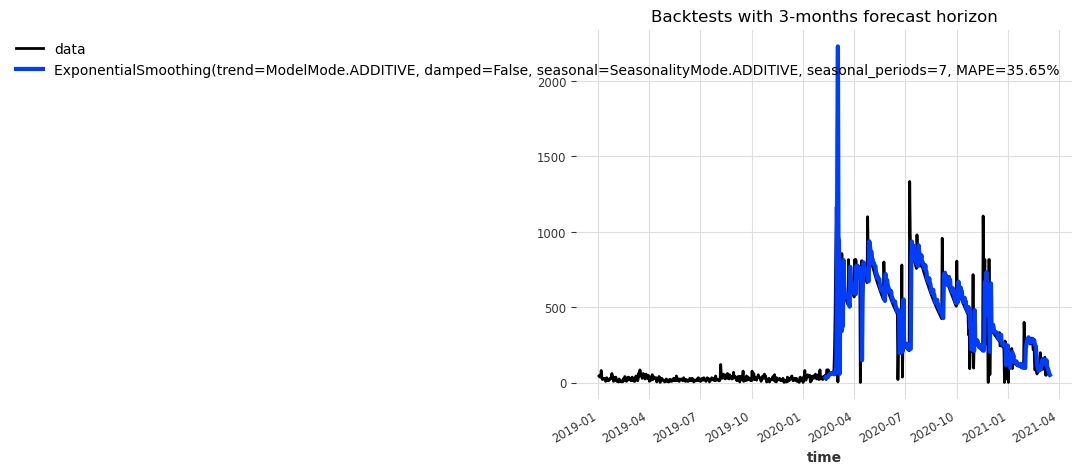

In [36]:
from darts.metrics import mape

df2.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], df2)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()

In [38]:
print(backtests[0])

<TimeSeries (DataArray) (time: 401, component: 1, sample: 1)>
array([[[  33.56201082]],

       [[  30.64580354]],

       [[  37.80685825]],

       [[  34.28816271]],

       [[  35.4947965 ]],

       [[  42.90871035]],

       [[  50.06338947]],

       [[  52.86576826]],

       [[  55.34279034]],

       [[  61.30851862]],

...

       [[ 123.89657899]],

       [[ 122.21024904]],

       [[ 128.140824  ]],

       [[ 148.58373551]],

       [[ 111.38516235]],

       [[  88.49334337]],

       [[  87.80197648]],

       [[  72.95944218]],

       [[  57.70386147]],

       [[  51.09945443]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-02-10 2020-02-11 ... 2021-03-16
  * component  (component) object 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [15]:
df_tst = pd.read_csv('dataset/merged_data_test.csv')

In [16]:
df_tst

,Unnamed: 0,date,wh_id,sales,tot_cases
0,0,17/03/21,1,NaN,352012
1,1,18/03/21,1,NaN,352907
2,2,19/03/21,1,NaN,353792
3,3,20/03/21,1,NaN,354782
4,4,21/03/21,1,NaN,355412
...,...,...,...,...,...
34094,34094,12/5/2021,97,NaN,193014
34095,34095,13/05/21,97,NaN,193732
34096,34096,14/05/21,97,NaN,194542
34097,34097,15/05/21,97,NaN,195179


In [17]:
import os

In [19]:
SAVE_PATH = os.path.join('dataset', 'wh_wise_data')

In [20]:
TRAIN_PATH = os.path.join(SAVE_PATH, 'train')
TEST_PATH = os.path.join(SAVE_PATH, 'test')

In [22]:
os.makedirs(TEST_PATH)

In [23]:
train_data = pd.read_csv('dataset/train.csv')

In [24]:
wh_ids = np.array(train_data["wh_id"].unique(), 'int64')

In [26]:
len(wh_ids)

560

In [30]:
from tqdm import tqdm

In [31]:
for id in tqdm(wh_ids):
    wh_data = df_tst.loc[df_tst['wh_id']==id]
    wh_data.to_csv(TEST_PATH+f'\\test_wh_{id}.csv')

100%|██████████| 560/560 [00:02<00:00, 270.36it/s]


In [32]:
len(os.listdir(TEST_PATH))

560

In [1]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
from tqdm.notebook import tqdm

In [2]:
TRAIN_PATH = 'dataset/wh_wise_data/train/'

In [3]:
tr_f = os.listdir(TRAIN_PATH)

In [4]:
tr_f

['train_wh_1.csv',
 'train_wh_10.csv',
 'train_wh_1000.csv',
 'train_wh_1001.csv',
 'train_wh_1002.csv',
 'train_wh_1003.csv',
 'train_wh_1004.csv',
 'train_wh_1005.csv',
 'train_wh_1006.csv',
 'train_wh_1007.csv',
 'train_wh_1008.csv',
 'train_wh_1009.csv',
 'train_wh_101.csv',
 'train_wh_1010.csv',
 'train_wh_1011.csv',
 'train_wh_1012.csv',
 'train_wh_1013.csv',
 'train_wh_1014.csv',
 'train_wh_1015.csv',
 'train_wh_1016.csv',
 'train_wh_1017.csv',
 'train_wh_1018.csv',
 'train_wh_1019.csv',
 'train_wh_1020.csv',
 'train_wh_1021.csv',
 'train_wh_1022.csv',
 'train_wh_1023.csv',
 'train_wh_1025.csv',
 'train_wh_1026.csv',
 'train_wh_1027.csv',
 'train_wh_1028.csv',
 'train_wh_1029.csv',
 'train_wh_103.csv',
 'train_wh_1030.csv',
 'train_wh_1031.csv',
 'train_wh_1033.csv',
 'train_wh_1037.csv',
 'train_wh_1038.csv',
 'train_wh_1039.csv',
 'train_wh_1040.csv',
 'train_wh_1042.csv',
 'train_wh_1049.csv',
 'train_wh_1050.csv',
 'train_wh_1058.csv',
 'train_wh_1059.csv',
 'train_wh_106.cs

In [5]:
# os.makedirs('expo_models')


KeyboardInterrupt



In [11]:
MODEL_PATH = 'expo_models/'

In [26]:
from tkinter import W


for wh in tqdm(tr_f):
     id = int(wh.split('_')[2][:-4])
     df = pd.read_csv(os.path.join(TRAIN_PATH, wh))
     df['date'] = pd.to_datetime(df['date'], dayfirst=True)
     model = ExponentialSmoothing()
     df_t = TimeSeries.from_dataframe(df, 'date', 'sales')
     model.fit(df_t)
     with open((MODEL_PATH+f'wh_{id}.pkl'), 'wb') as f:
          model_pkl = pkl.dump(model, f)


  0%|          | 0/559 [00:00<?, ?it/s]

d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: O

In [6]:
with open('expo_models/wh_1.pkl', 'rb') as f:
    m = pkl.load(f, encoding='latin-1')

In [8]:
model_lst = os.listdir('expo_models/')

In [1]:
import pickle as pkl

In [2]:
from darts import TimeSeries

In [3]:
from darts.metrics import rmse

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('dataset/wh_wise_data/train/train_wh_1.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df2 = TimeSeries.from_dataframe(df, 'date', 'sales')

In [6]:
from tqdm.notebook import tqdm

In [8]:
import json

In [17]:
with open('expo_model_rmse.json', 'r') as f:
        x = json.load(f)

In [18]:
x = list(x.values())

In [21]:
with open('Multivariate-time-series-forecasting-keras-main\\transformer_metrics.json', 'r') as f:
        x1 = json.load(f)

In [22]:
x1

[166.34028578583948,
 321.96434894745846,
 293.1608139628558,
 231.48304353570956,
 213.33482841424401,
 199.10050311238996,
 154.51951873955602,
 220.31222913041563,
 253.04200663036744,
 226.29299245142516,
 181.58820237819015,
 146.0069532929488,
 113.23849857203301,
 198.65193432376594,
 172.48887476478555,
 166.22709465017473,
 190.30761187692016,
 237.63824395596987,
 302.8280114002874,
 290.9985765116877,
 186.07887080510062,
 206.22725705595911,
 213.764473884756,
 124.02124411153905,
 137.27856652676175,
 219.03838899246873,
 229.48110249651523,
 302.6159059034632,
 157.06061560310712,
 216.72513174135332,
 152.2878758147981,
 204.97612841355166,
 139.2541240069613,
 185.75612994923358,
 168.2833958470705,
 135.65694869362605,
 201.65766985787548,
 203.0405635682144,
 284.12650863147206,
 114.06323322830977,
 151.12433483935513,
 215.6570060443998,
 166.04014905450452,
 221.89955155462604,
 112.66508705406955,
 172.84293427143638,
 178.5020922208784,
 193.12658697116743,
 259.

In [23]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


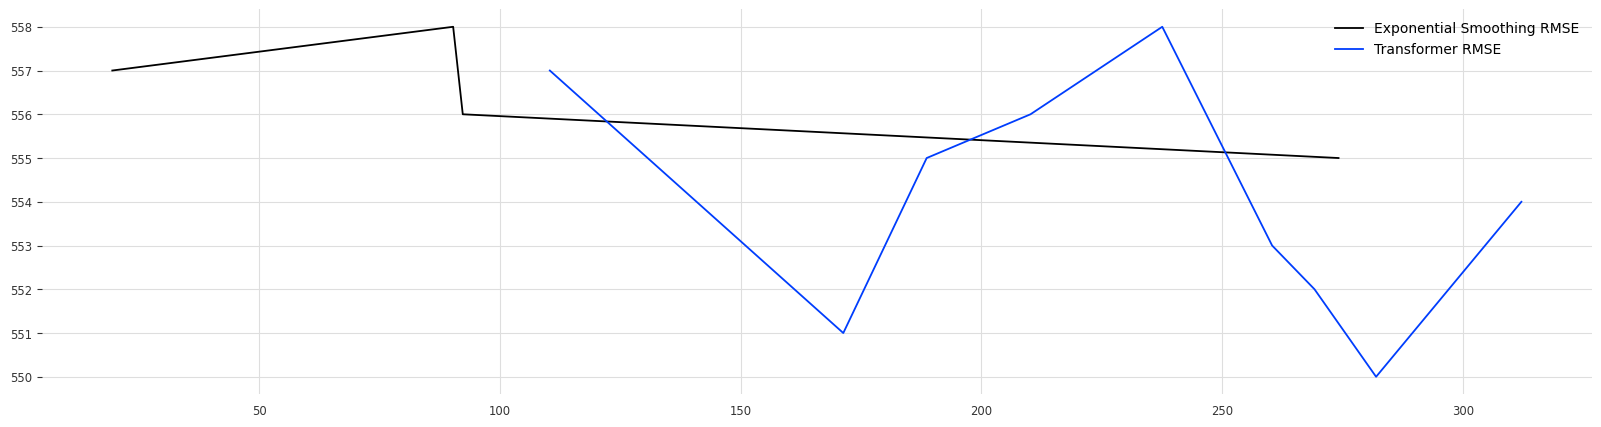

In [44]:
plt.figure(figsize=(20,5), )
sns.lineplot(x[555:], [i for i in range(len(x))][555:])
sns.lineplot(x1[550:], [i for i in range(len(x1))][550:])
plt.legend(['Exponential Smoothing RMSE', 'Transformer RMSE'])

In [46]:
dfx = pd.read_csv('dataset/wh_wise_data/train/train_wh_1389.csv')

In [47]:
dfx['date'] = pd.to_datetime(dfx['date'], dayfirst=True)

Text(0.5, 1.0, 'Warehouse 1389')

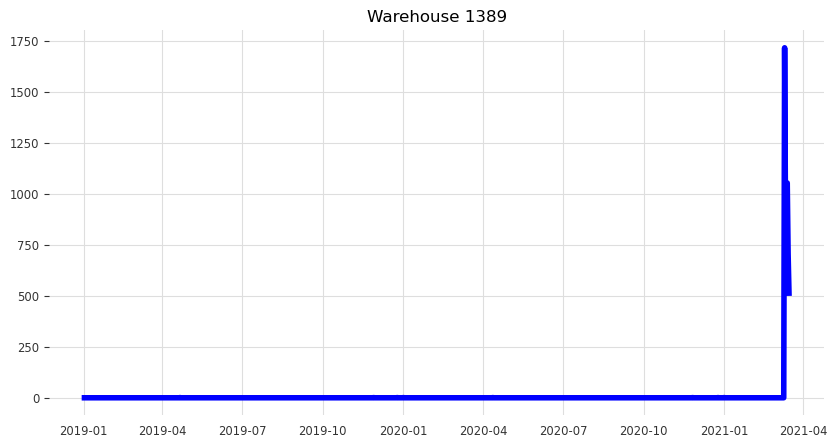

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(dfx['date'], dfx['sales'], linewidth=4, color='b')
plt.title('Warehouse 1389')

In [7]:
from darts.models import TBATS
models = [TBATS()]

backtests = [tqdm(model.historical_forecasts(df2,
                            start=.5,
                            forecast_horizon=3, verbose=2))
             for model in models]

  0%|          | 0/401 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [29]:
rmse_dict = dict()

In [31]:
for m in tqdm(model_lst):
    with open('expo_models/'+m, 'rb') as f:
        model = pkl.load(f)
    id = m.split('.')[0]
    df = pd.read_csv('dataset/wh_wise_data/train/train_'+id+'.csv')
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df_t = TimeSeries.from_dataframe(df, 'date', 'sales')
    preds = model.historical_forecasts(df_t,
                            start=.9,
                            forecast_horizon=3)
    
    metric = rmse(preds, df_t)
    rmse_dict[id] = metric

  0%|          | 0/559 [00:00<?, ?it/s]

d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
d:\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: O

In [39]:
import json


with open('expo_model_rmse.json', 'w') as f:
        json.dump(rmse_dict, f)

In [11]:
with open('expo_models/wh_1.pkl', 'rb') as f:
        model = pkl.load(f)

In [16]:
df_try = pd.read_csv('dataset/wh_wise_data/train/train_wh_1.csv')

In [20]:
df_try['date'] = pd.to_datetime(df_try['date'], dayfirst=True)
df_try2 = TimeSeries.from_dataframe(df_try, 'date', 'sales')

In [24]:
x = model.historical_forecasts(df_try2,
                            forecast_horizon=3)

In [25]:
rmse(df_try2, x)

207.7421718367049

In [40]:
with open('expo_model_rmse.json', 'r') as f:
    x = json.load(f)